In [1]:
import astropy.units as u
import astropy.constants as const
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

from matplotlib.ticker import MultipleLocator

In [3]:
import glob
import os
import sys
sys.path.append('../tools/')

from dust_extinction import calALambda
from spec_to_flux import spec_to_flux, spec_to_mag
from data_binning import data_binning

In [4]:
with open('CSP_spec_phot.ascii') as f:
    lines = f.readlines()
len(lines[6:-1])

134

In [12]:
SN_names = np.empty(133, dtype='object')
v_Si, EW_Si_5972, EW_Si_6355, M_B_max = np.empty(
    133), np.empty(133), np.empty(133), np.empty(133)
v_Si_unc, EW_Si_5972_unc, EW_Si_6355_unc, M_B_max_unc = np.empty(
    133), np.empty(133), np.empty(133), np.empty(133)
sample = np.empty(133, dtype='object')

k = 0
for l in lines[6:-1]:
    info = l.split('\t')
    try:
        v_Si[k] = float(info[2].split()[0])
        v_Si_unc[k] = float(info[2].split()[-1])
        EW_Si_5972[k] = float(info[3].split()[0])
        EW_Si_5972_unc[k] = float(info[3].split()[-1])
        EW_Si_6355[k] = float(info[4].split()[0])
        EW_Si_6355_unc[k] = float(info[4].split()[-1])
        M_B_max[k] = float(info[5].split()[0])
        M_B_max_unc[k] = float(info[5].split()[-1])
        SN_names[k] = info[0]
    except IndexError:
        continue
    if info[6] == 'cdots':
        sample[k] = 'Zheng+2018'
    else:
        sample[k] = 'CSP'
    
    k += 1


In [47]:
z = 0.02736
z_unc = 0.00007
M_B_max_joj = -19.6315

C = 299792.458
v_Si_joj = 10278.512
v_Si_joj_unc = 131.228
beta = v_Si_joj / C

(8.2, 16.2)

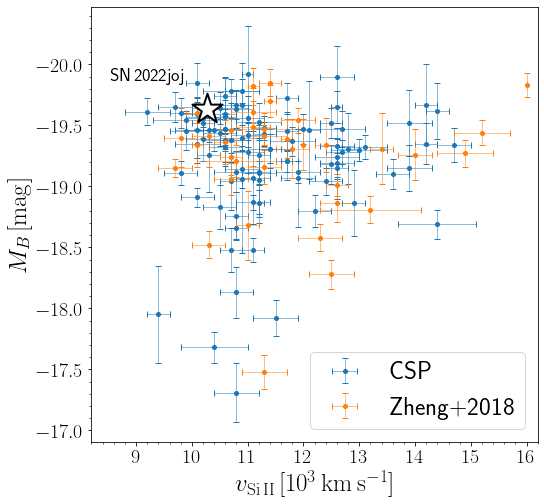

In [51]:
CSP_idx = sample == 'CSP'
fig = plt.figure(figsize=(8, 8))
plt.errorbar(v_Si[CSP_idx], M_B_max[CSP_idx], xerr=v_Si_unc[CSP_idx],
             yerr=M_B_max_unc[CSP_idx], fmt='o', capsize=3, label='CSP', elinewidth=.5, ms=4)
plt.errorbar(v_Si[~CSP_idx], M_B_max[~CSP_idx], xerr=v_Si_unc[~CSP_idx],
             yerr=M_B_max_unc[~CSP_idx], fmt='o', capsize=3, label='Zheng+2018', elinewidth=.5, ms=4)
plt.gca().invert_yaxis()
plt.xlabel(r'$v_{\mathrm{Si\,II}}\,[10^3\,\mathrm{km}\,\mathrm{s}^{-1}]$')
plt.ylabel(r'$M_B\,[\mathrm{mag}]$')
plt.legend()

plt.scatter(v_Si_joj/1e3, y=M_B_max_joj, zorder=99, marker='*', s=1000, facecolor='white', color='k', linewidth=2)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.2))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.1))
plt.text(s='SN\,2022joj', x=9.2, y=-19.9, fontsize=18, ha='center', va='center')
plt.xlim(8.2, 16.2)

In [23]:
EW_Si_6355_joj, EW_Si_6355_unc_joj = 27.801, 1.271
EW_Si_5972_joj, EW_Si_5972_unc_joj = 2.928, [[2.928-1.239], [3.721-2.928]]  


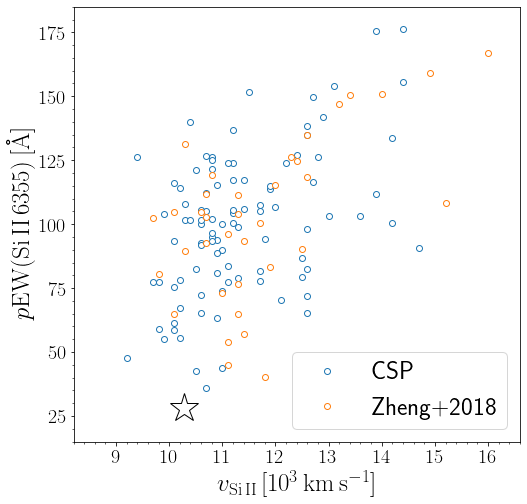

In [44]:
fig = plt.figure(figsize=(8, 8))
plt.errorbar(v_Si[CSP_idx], EW_Si_6355[CSP_idx],
             fmt='o', capsize=3, label='CSP', markerfacecolor='w')
plt.errorbar(v_Si[~CSP_idx], EW_Si_6355[~CSP_idx],
             fmt='o', capsize=3, label='Zheng+2018', markerfacecolor='w')
plt.xlabel(r'$v_{\mathrm{Si\,II}}\,[10^3\,\mathrm{km}\,\mathrm{s}^{-1}]$')
plt.ylabel(r'$p\mathrm{EW}(\mathrm{Si\,II}\,6355)\,[\mathrm{\r{A}}]$')
plt.legend()

plt.errorbar(v_Si_joj/1e3, EW_Si_6355_joj, #xerr=v_Si_joj_unc/1e3, yerr=EW_Si_6355_unc_joj, 
             fmt='*', ms=30, capsize=5, markerfacecolor='white', color='k')
plt.xlim(8.2, 16.6)
plt.ylim(15, 185)


plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.2))
plt.gca().yaxis.set_major_locator(MultipleLocator(25))
plt.gca().yaxis.set_minor_locator(MultipleLocator(5))


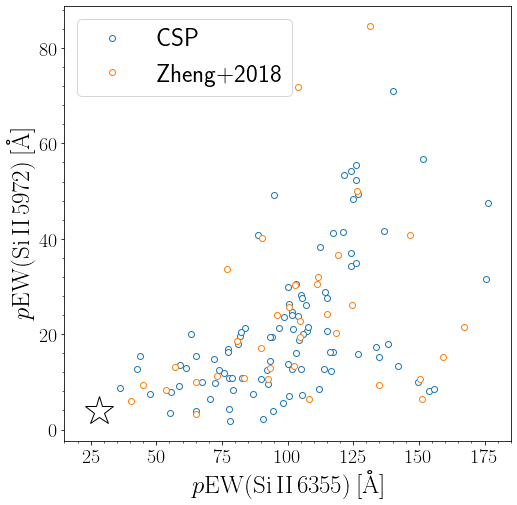

In [45]:
fig = plt.figure(figsize=(8, 8))
plt.errorbar(EW_Si_6355[CSP_idx], EW_Si_5972[CSP_idx],
             fmt='o', capsize=3, label='CSP', markerfacecolor='w')
plt.errorbar(EW_Si_6355[~CSP_idx], EW_Si_5972[~CSP_idx],
             fmt='o', capsize=3, label='Zheng+2018', markerfacecolor='w')
plt.xlabel(r'$p\mathrm{EW}(\mathrm{Si\,II}\,6355)\,[\mathrm{\r{A}}]$')
plt.ylabel(r'$p\mathrm{EW}(\mathrm{Si\,II}\,5972)\,[\mathrm{\r{A}}]$')
plt.legend()

plt.errorbar(EW_Si_6355_joj, EW_Si_5972_joj, #xerr=EW_Si_6355_unc_joj, yerr=EW_Si_5972_unc_joj, 
             fmt='*', ms=30, capsize=5, markerfacecolor='white', color='k')
plt.xlim(15, 185)

plt.gca().xaxis.set_major_locator(MultipleLocator(25))
plt.gca().xaxis.set_minor_locator(MultipleLocator(5))
plt.gca().yaxis.set_major_locator(MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(MultipleLocator(4))

In [38]:
PTF_sample = pd.read_csv('./PTF_SN_lines.csv', sep='|', comment='#')
v = PTF_sample.SN.value_counts()
multiple_obs = PTF_sample[PTF_sample.SN.isin(v.index[v.gt(0)])]
SN_list = set(multiple_obs['SN'])

In [39]:
phases_joj = [-12.49, 2.16, 8.65]
EWs_Si_6355_joj = [47.389, 28.055, 48.504]
EWs_Si_6355_unc_joj = [2.478, 1.263, 0.581]

PTF10xyt  [-10.8  -8.8  -4.8] [61.4 63.4 72.8]
PTF09dlc  [-10.8  -5.8  -3.8  -2.8  -0.8] [96.9 63.2 57.2 62.9 82.8]
PTF10qky  [-10.3   0.7] [55.6 77. ]
PTF10icb  [-11.6  -5.6   4.4] [78.7 79.4 99.1]
PTF10qjq  [-10.7  -2.7   0.3   3.3] [34.6 56.3 69.3 63.8]
PTF10hmv  [-14.1   4.9] [41.9 59.7]


<ErrorbarContainer object of 3 artists>

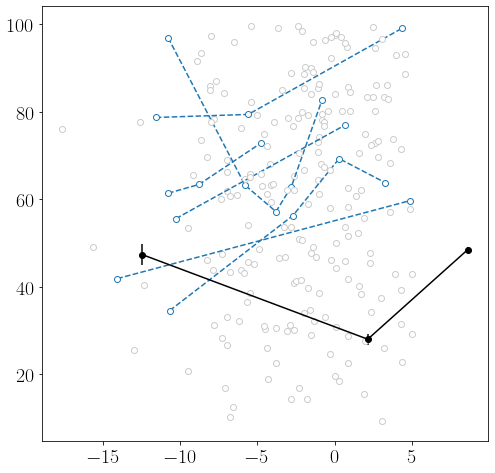

In [40]:
plt.figure(figsize=(8, 8))
for SN in SN_list:
    target = multiple_obs[multiple_obs['SN'] == SN]
    if (target['W5355'].max() > 100): continue
    if (target['Phase'].min() > -10) or (target['Phase'].max() < -5) or len(target) == 1:
        # pass
        plt.errorbar(target['Phase'], target['W5355'], fmt='o', color='0.8', markerfacecolor='w')
    else:
        plt.errorbar(target['Phase'], target['W5355'], marker='o', color='tab:blue', linestyle='--', markerfacecolor='w')
        print(SN, target['Phase'].values, target['W5355'].values)

plt.errorbar(phases_joj, EWs_Si_6355_joj, yerr=EWs_Si_6355_unc_joj, marker='o', color='k')